# 데이터 시각화

- 데이터를 분석한 결과를 쉽게 이해할 수 있도록 표현하여 전달하는 것 
- 데이터 시각화가 필요한 이유**
    - 1) 많은 양의 데이터를 한눈에 살펴볼 수 있음.
    - 2) 전문 지식이 없더라도 누구나 쉽게 데이터를 인지하고 사용할 수 있음.
    - 3) 단순한 데이터의 요약이나 나열보다 더 정확한 데이터 분석 결과를 얻을 수 있음. 
    - 4) 단순한 데이터에서는 알 수 없었던 중요한 정보를 파악할 수 있음.
    

- 파이썬의 시각화 라이브러리 
    - matplotlib, seaborn, wordcloud + folium(지도 시각화)
        - matplotlib이 표준, seaborn은 좀더 통계분석적

# 그래프란

- 서로 연관성 있는 1개 또는 그 이상의 양에 대한 상대값을 도형으로 나타내는 것

## 데이터의 개수, 종류에 따른 그래프의 종류

- 일변량 데이터: 데이터 개수 1개
    - 연속형 - 주로 데이터의 분포 확인 (ex. 키)
        - 히스토그램(histogram)
        - 박스플롯(상자수염그래프, boxplot)
        - 바이올린 그래프(violin)
        - 커널 밀도 그래프(kernel density curve)
    - 범주형 
        - 막대그래프(bar chart)
        - 파이 차트(pie chart)

- 다변량 데이터: 데이터 개수 2개 이상
    - 연속형
        - 산점도(scatter plot)
        - 선 그래프(line graph)
        - 시계열 그래프
    - 범주형 
        - 모자이크 그래프(mosaic graph)
        - tree map 그래프

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud

# matplotlib 한글깨짐 방지 폰트사용 
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf" # 맑은 고딕...
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family=font_name)

# 기본 그래프

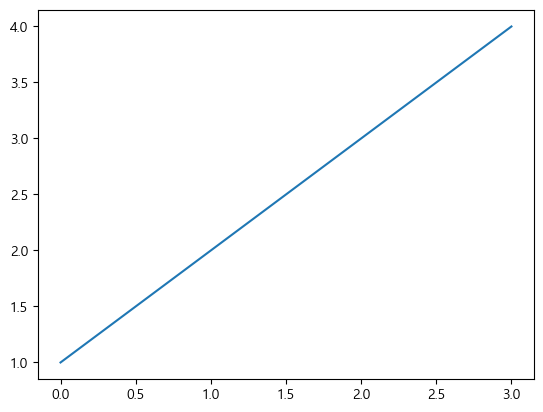

In [2]:
plt.plot([1,2,3,4])

Text(0, 0.5, 'y-label')

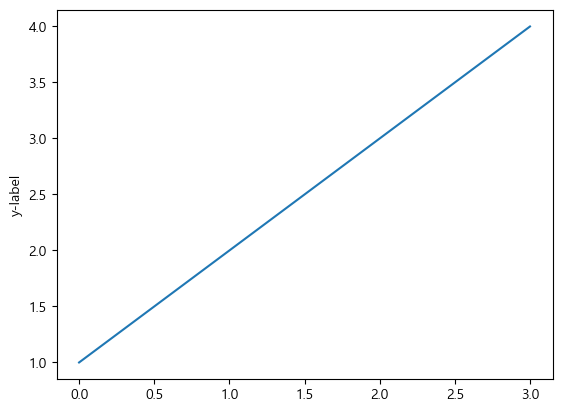

In [3]:
plt.plot([1,2,3,4])
plt.ylabel("y-label")

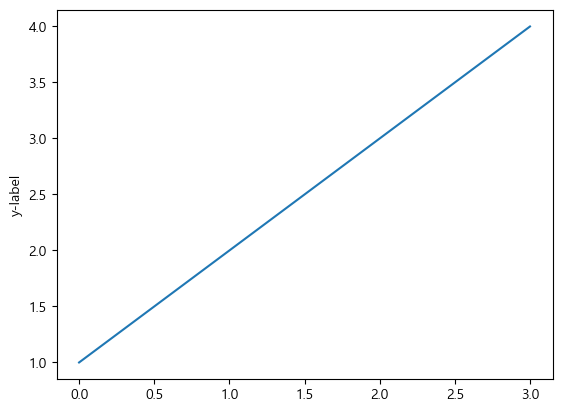

In [4]:
plt.plot([1,2,3,4])
plt.ylabel("y-label")
plt.show()

Q. plt.show() 가 있고 없고의 차이? 
- plt.show() 안할시에 안보여지는 경우도 있고, 
- 쓸데없는 [<matplotlib.lines.Line2D at 0x2db023ba508>] 애들, 경고문 등이 같이 나올 수 있음.
- 항상 쓰는 것이 좋음. 

Q. x축의 범위가 0.0~ 3.0인 이유?
- (0,1), (1,2) ... 
- 리스트 값이 y값이라고 가정하고, x값 자동으로 생성(0,1,2,3)

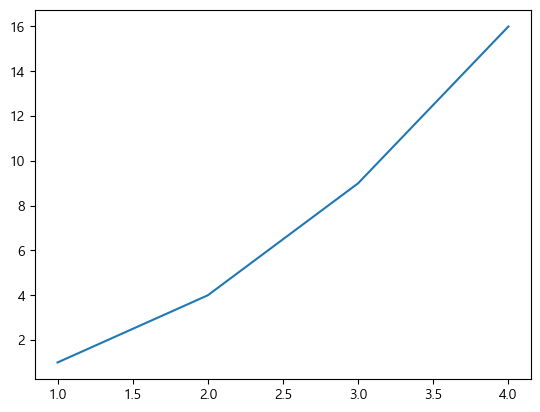

In [5]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

x축은 1.0, 2.0 ... 이렇게 실수로 나온 모습 --> 왜? 
- 그리고 왜 점 그래프가 아니라, 연속적인 선 그래프로 나올까?

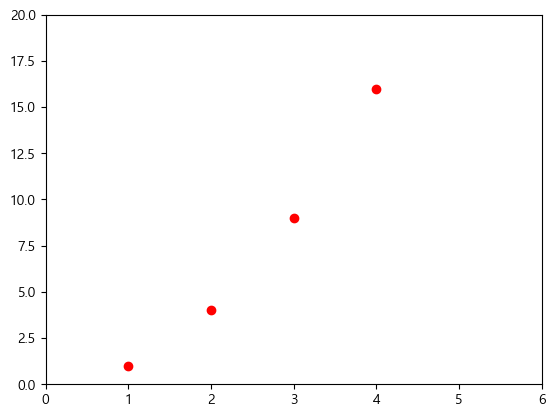

In [6]:
# 빨간색의 점그래프로 나타내주는 방법
plt.plot([1,2,3,4],[1,4,9,16], "ro") # red, o(circle marker,점찍기)
# 기본값은 "b-": blue, -(선그래프)
plt.axis([0,6,0,20]) # 축의 범위: [xmin, xmax, ymin, ymax]
plt.show()

## 범례 추가 

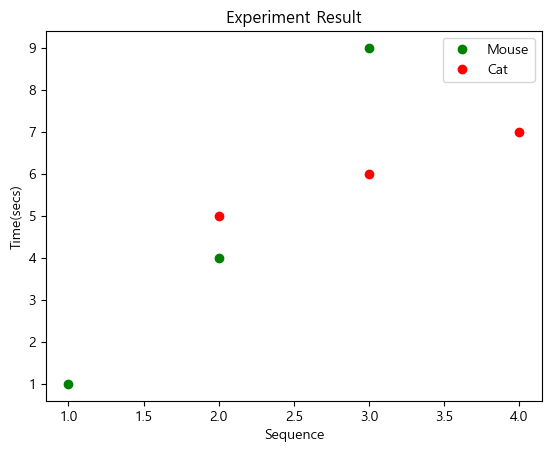

In [7]:
plt.plot([1,2,3], [1,4,9], "go")
plt.plot([2,3,4], [5,6,7], "ro")
# 똑같은 도화지에 그래프를 또 그림 

plt.xlabel("Sequence")
plt.ylabel("Time(secs)")
plt.title("Experiment Result")
plt.legend(['Mouse', 'Cat']) # 범례
plt.show()

# 여러 개의 그래프 그리기

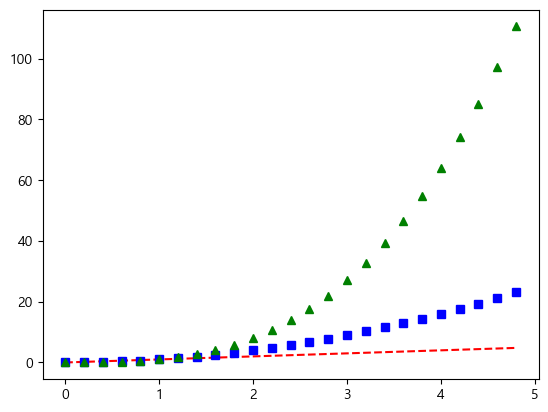

In [9]:
t = np.arange(0,5,0.2) # 넘파이는 실수증가 range 지원! (그냥 파이썬은 불가)

plt.plot(t,t,"r--", t,t**2, "bs", t,t**3, "g^")
# 이런식으로 한줄코드로 그래프 겹쳐서 그리기
# "--": 점선 그래프
# "bs": 파란, s(네모 점그래프)
# "g^": 초록, ^(세모 점그래프)
plt.show()

- 다양한 Line styles, color, markers 조합 표(matplotlib_set_marker.png) 확인하기!! 

<img src = "matplotlib_set_marker.png">

# 연습문제

- 2010년부터 2018년까지 매년 수집한 데이터가 아래와 같다.
- 이를 matplotlib의 plot함수를 이용하여 선그래프로 나타내시오.
    - 선은 빨간색 실선으로, 마커는 사각형으로 표시
    - x축의 눈금은 년도를 나타내는 숫자로 표시

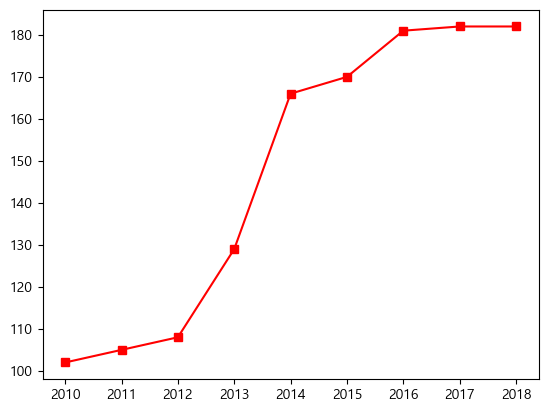

In [10]:
data = [102, 105, 108, 129, 166, 170, 181, 182, 182]
plt.plot(range(2010,2019), data, "r-s")
# plt.xticks(np.arange(2010,2019), labels=range(2010,2019))
plt.show()

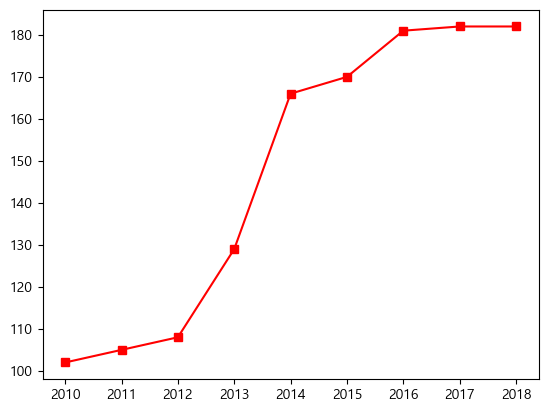

In [27]:
data = [102, 105, 108, 129, 166, 170, 181, 182, 182]
plt.plot(range(0,9), data, "r-s")
# 조금더 정확하고 엄밀한 눈금의 레이블 지정 
plt.xticks(range(0,9), labels=range(2010,2019))
plt.show()

# 그래프 영역 채우기

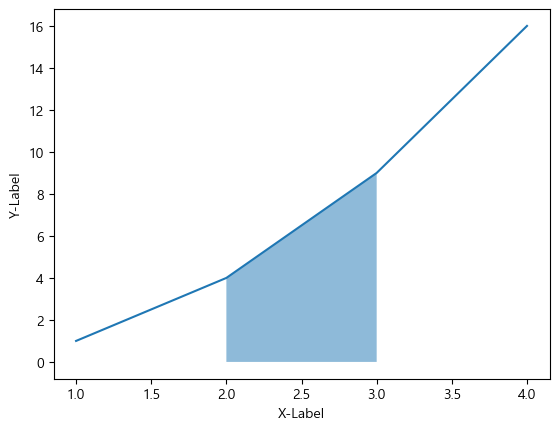

In [11]:
x = [1,2,3,4]
y = [1,4,9,16]

plt.plot(x,y)
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
# 그래프 안 영역에 색 채워주기
plt.fill_between(x[1:3], y[1:3], alpha=0.5)
# alpha: 0.5 만큼 투명하게 
plt.show()

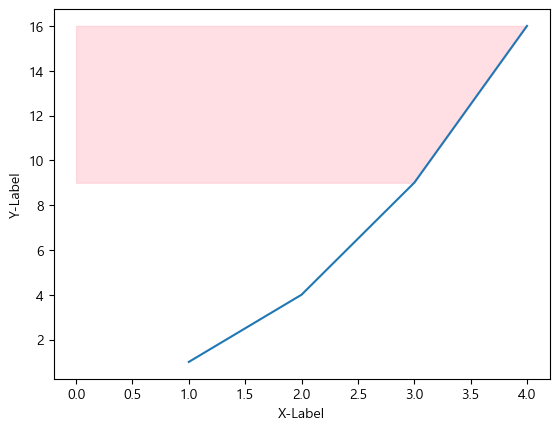

In [13]:
x = [1,2,3,4]
y = [1,4,9,16]

plt.plot(x,y)
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
# "반대로" 그래프 "위쪽" 영역에 색 채워주기
plt.fill_betweenx(y[2:4],x[2:4], alpha=0.5, color='pink')
# alpha: 0.5 만큼 투명하게 
plt.show()

# 임의의 영역 채우기

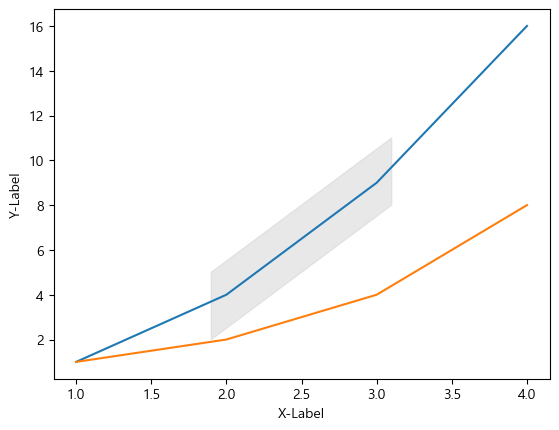

In [14]:
x = [1,2,3,4]
y1=  [1,4,9,16]
y2= [1,2,4,8]

plt.plot(x,y1,x,y2)
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.fill([1.9,1.9,3.1,3.1],[2,5,11,8],color="lightgray",alpha=0.5)
# 마름모 꼭짓점 4개 점 안의 영역을 채워줌 
plt.show()

# 여러 곡선 그리기 

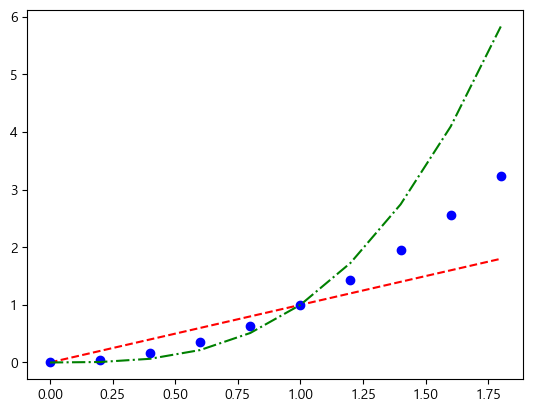

In [15]:
a = np.arange(0,2,0.2)

plt.plot(a,a,'r--',a,a**2,'bo',a,a**3,'g-.')
plt.show()

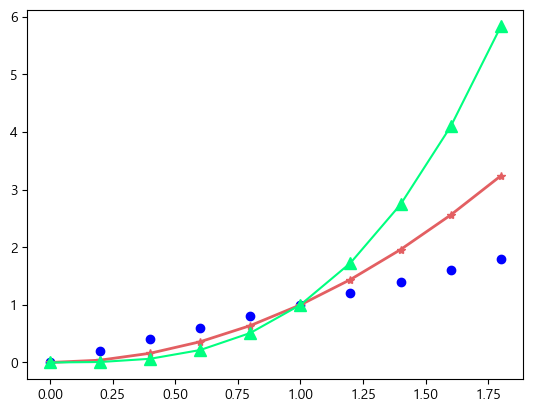

In [16]:
# 각 그래프에 대한 속성 개별 설정
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
# RGB : __/__/__ 각각 16진법으로 나타낸 컬러코드 
# 여기선 R값(e3)이 제일 커서 빨강에 가까운 색이 나타남. 
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
plt.show()

# 격자 설정 

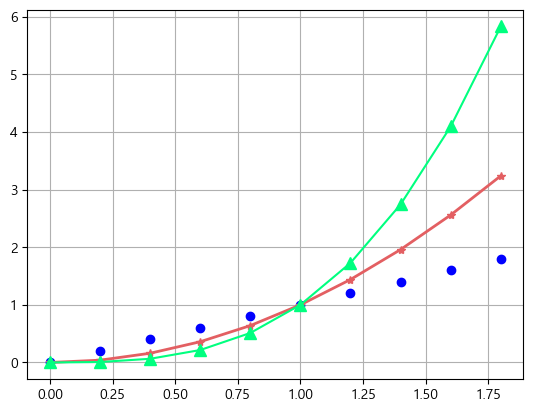

In [17]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
plt.grid(True)
plt.show()

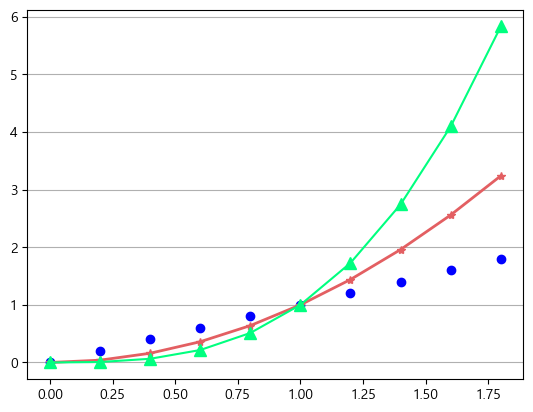

In [18]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
# y축에서 뻗어나오는 격자선만
plt.grid(True, axis='y')
plt.show()

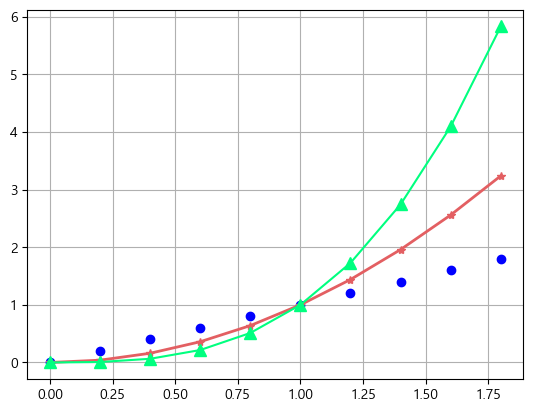

In [19]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
plt.grid()
plt.show()

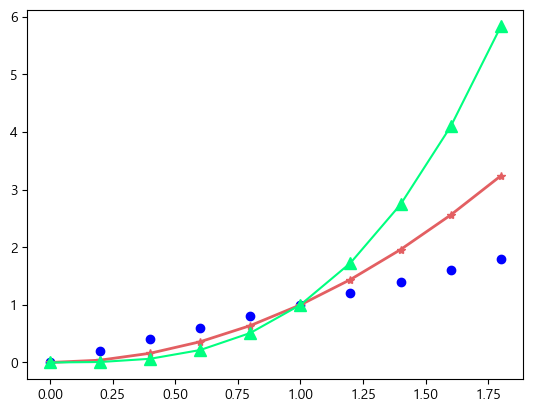

In [20]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
plt.grid(False)
plt.show()

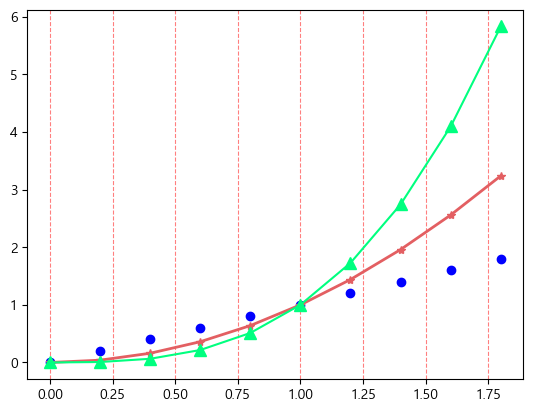

In [21]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)
plt.grid(True,axis='x', color='red', alpha=0.5, linestyle='--')
plt.show()

# 눈금 표시

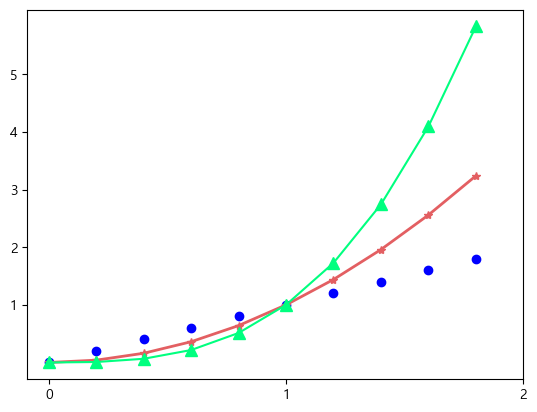

In [23]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)

plt.xticks([0,1,2]) # x축의 눈금
plt.yticks(np.arange(1,6)) # y축의 눈금

plt.show()

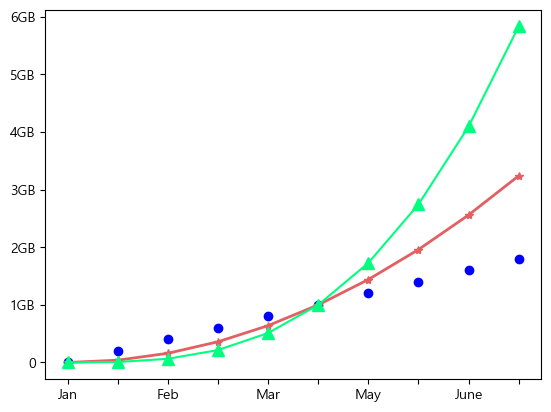

In [24]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)

# 눈금의 레이블 속성 지정
plt.xticks(np.arange(0,2,0.2), labels=["Jan", "", "Feb", "", "Mar", "", "May", "", "June", ""]) # x축의 눈금
plt.yticks(np.arange(0,7), ("0", "1GB", "2GB", "3GB", "4GB", "5GB", "6GB")) # y축의 눈금
# 눈금을 찍을 위치, 눈금에 어떤 이름이 붙을지
plt.show()

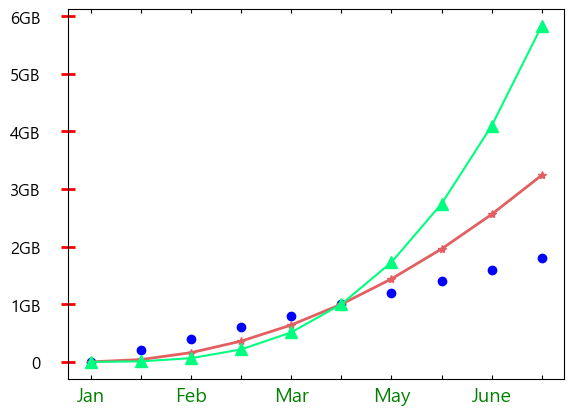

In [28]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)

# 눈금의 레이블 속성 지정
plt.xticks(np.arange(0,2,0.2), labels=["Jan", "", "Feb", "", "Mar", "", "May", "", "June", ""]) # x축의 눈금
plt.yticks(np.arange(0,7), ("0", "1GB", "2GB", "3GB", "4GB", "5GB", "6GB")) # y축의 눈금
# 눈금을 찍을 위치, 눈금에 어떤 이름이 붙을지

# 눈금의 스타일 설정
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='green', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=2, color='r')

plt.show()

- tick_params(): 눈금의 스타일 설정
    - axis: 설정이 적용될 축 지정 - x,y,both 중
    - direction: 눈금이 안에서 혹은 밖에서 표시될지 - in,out,inout
    - length: 눈금의 길이
    - pad: 눈금과 레이블과의 거리
    - labelsize: 레이블의 크기
    - labelcolor: 레이블의 색상
    - top/bottom/left/right: 눈금이 표시될 위치 선택
    - width: 눈금의 너비
    - color: 눈금의 색상 
    - rotation: 눈금 레이블 기울여주기 

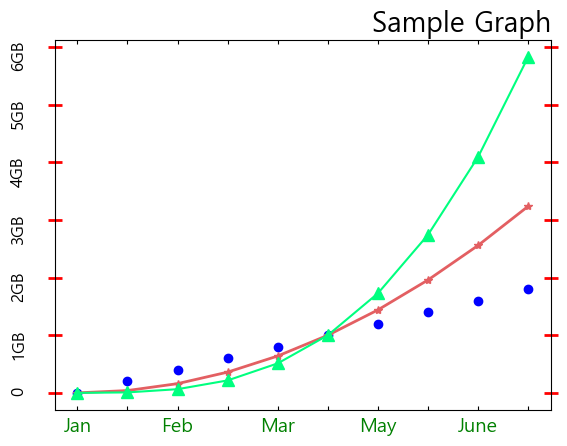

In [33]:
plt.plot(a,a,'bo')
plt.plot(a,a**2,color='#e35f62',marker='*',linewidth=2)
plt.plot(a,a**3,color='springgreen',marker='^',markersize=9)

# 눈금의 레이블 속성 지정
plt.xticks(np.arange(0,2,0.2), labels=["Jan", "", "Feb", "", "Mar", "", "May", "", "June", ""]) # x축의 눈금
plt.yticks(np.arange(0,7), ("0", "1GB", "2GB", "3GB", "4GB", "5GB", "6GB")) # y축의 눈금
# 눈금을 찍을 위치, 눈금에 어떤 이름이 붙을지

# 눈금의 스타일 설정
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='green', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=2, color='r', right=True, rotation=90)

plt.title("Sample Graph", loc="right", size=20)
plt.show()

# <여러 그래프들>

# 1. 꺾은 선 그래프 

- 연속적으로 변화하는 데이터를 살펴보고자 할때 주로 사용 
    - 시간에 따른 데이터의 연속적인 변화량을 관찰할 때
                - ex. 시간에 따른 기온 변화, 
                - 물을 끓인 다음 식히면서 시간에 따른 물의 온도 변화

## 데이터 시각화 예제

- 데이터
    - 주요 국가의 2020년 4월 둘째 주의 코로나 발생 현황 

In [3]:
df = pd.read_csv("./주요발생국가주간동향(4월2째주).csv",index_col='국가')
df.head()

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790


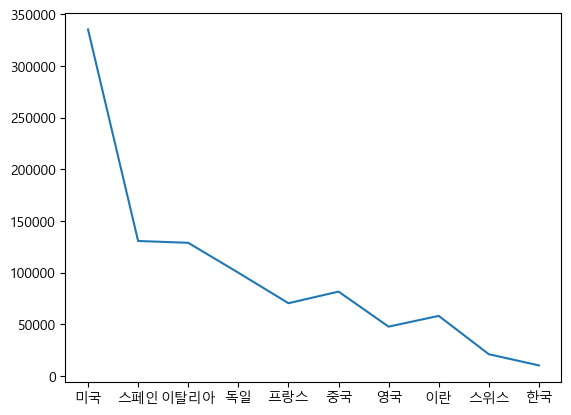

In [4]:
plt.plot(df['4월06일'])

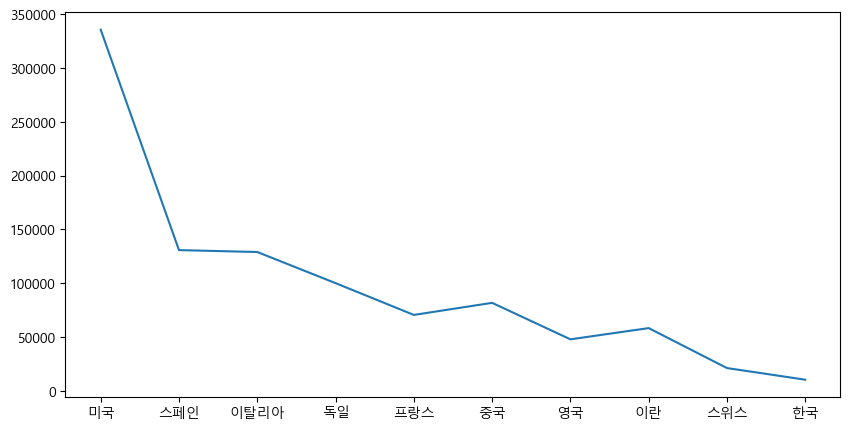

In [5]:
chardata = df['4월06일']

# 가상공간: plt.figure()
# fig --> Figure(1000x500)
fig = plt.figure(figsize=(10,5))
plt.plot(chardata)
plt.show()

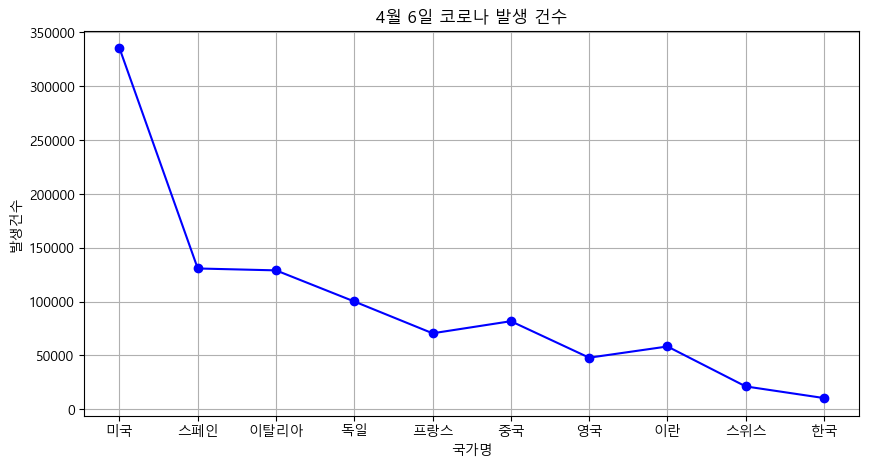

In [6]:
# 가상공간: plt.figure()
fig = plt.figure(figsize=(10,5))
plt.plot(chardata, "b-o")
plt.grid(True)
plt.xlabel("국가명")
plt.ylabel("발생건수")
plt.title("4월 6일 코로나 발생 건수")
plt.show()

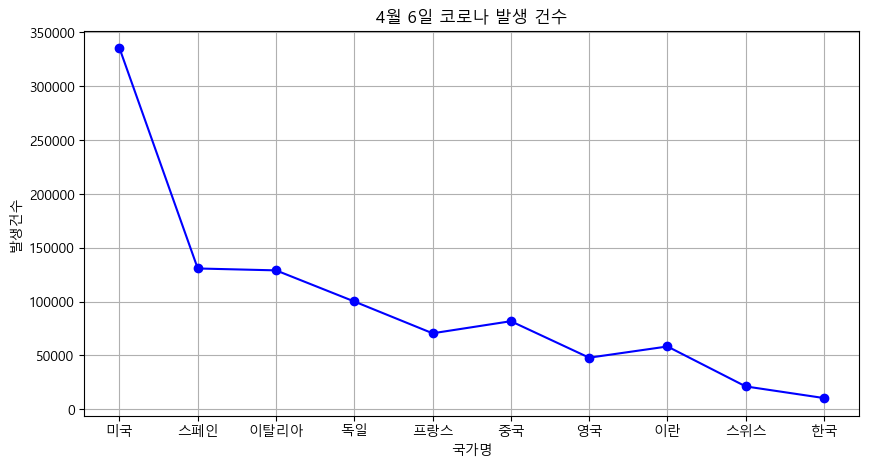

In [7]:
fig

In [8]:
print(fig)

Figure(1000x500)


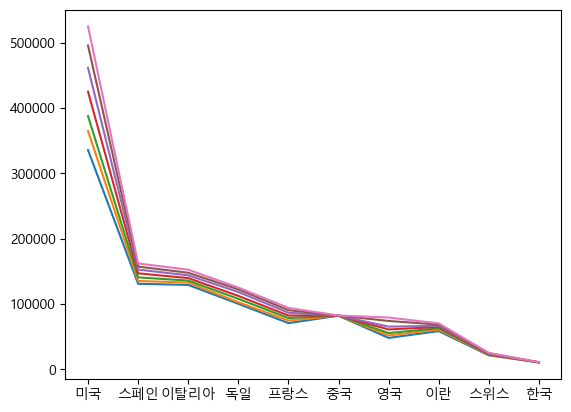

In [9]:
plt.plot(df.index, df.values)

## 예제 2

- 특정 국가의 특정 기간에 대한 꺾은선 그래프

In [10]:
chartdata = df.loc[["스페인", "프랑스", "독일", "중국", "영국", "이란"], :"4월10일"]
chartdata

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
독일,100024,102453,107591,112113,118181
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [20]:
chartdata.T

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


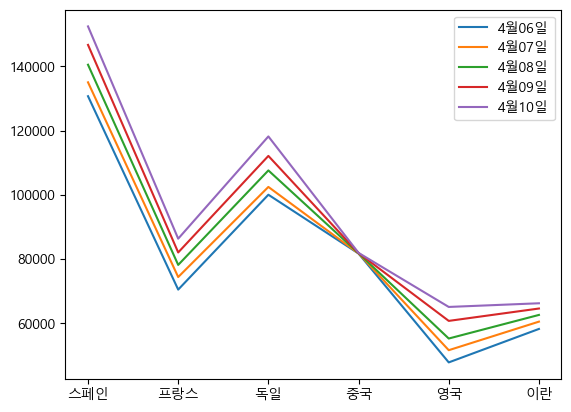

In [11]:
plt.plot(chartdata)
plt.legend(chartdata.columns)
plt.show()

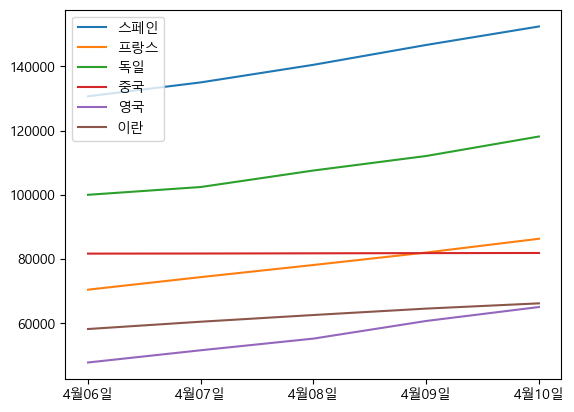

In [14]:
plt.plot(chartdata.T)
plt.legend(chartdata.T.columns)
plt.show()

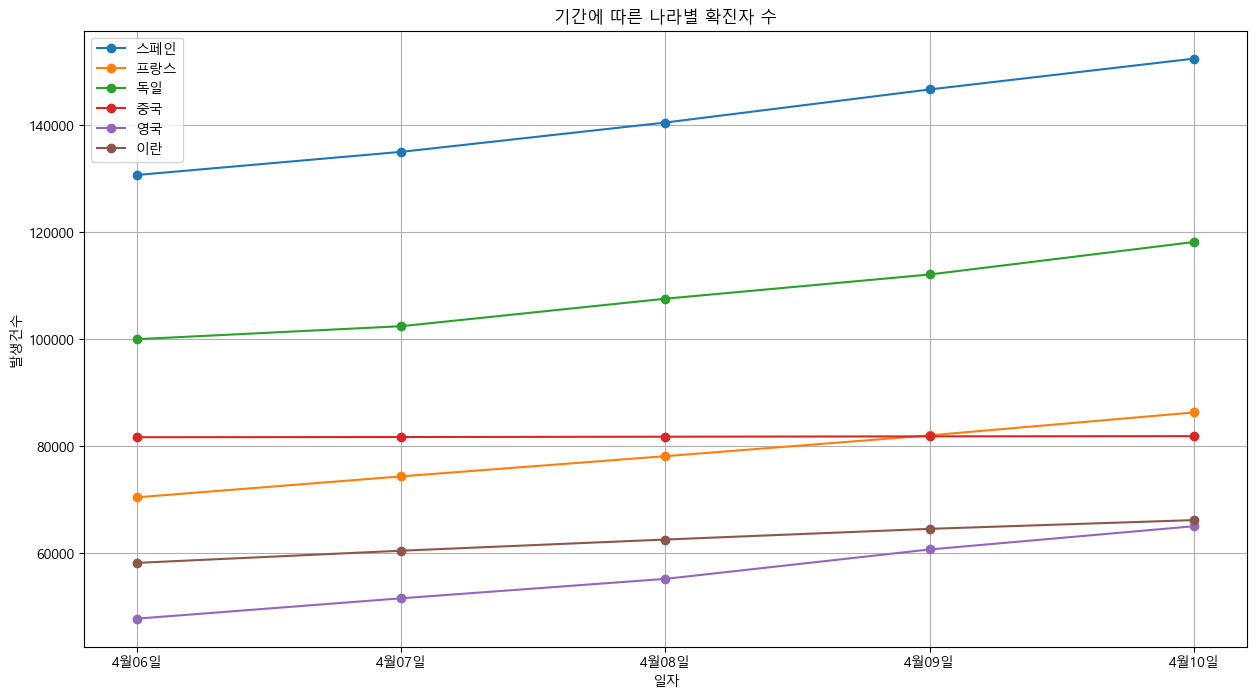

In [18]:
fig = plt.figure(figsize=(15,8))
plt.plot(chartdata.T, marker='o')
plt.legend(chartdata.T.columns)
plt.xlabel("일자")
plt.ylabel("발생건수")
plt.title("기간에 따른 나라별 확진자 수")
plt.grid(True)
plt.show()

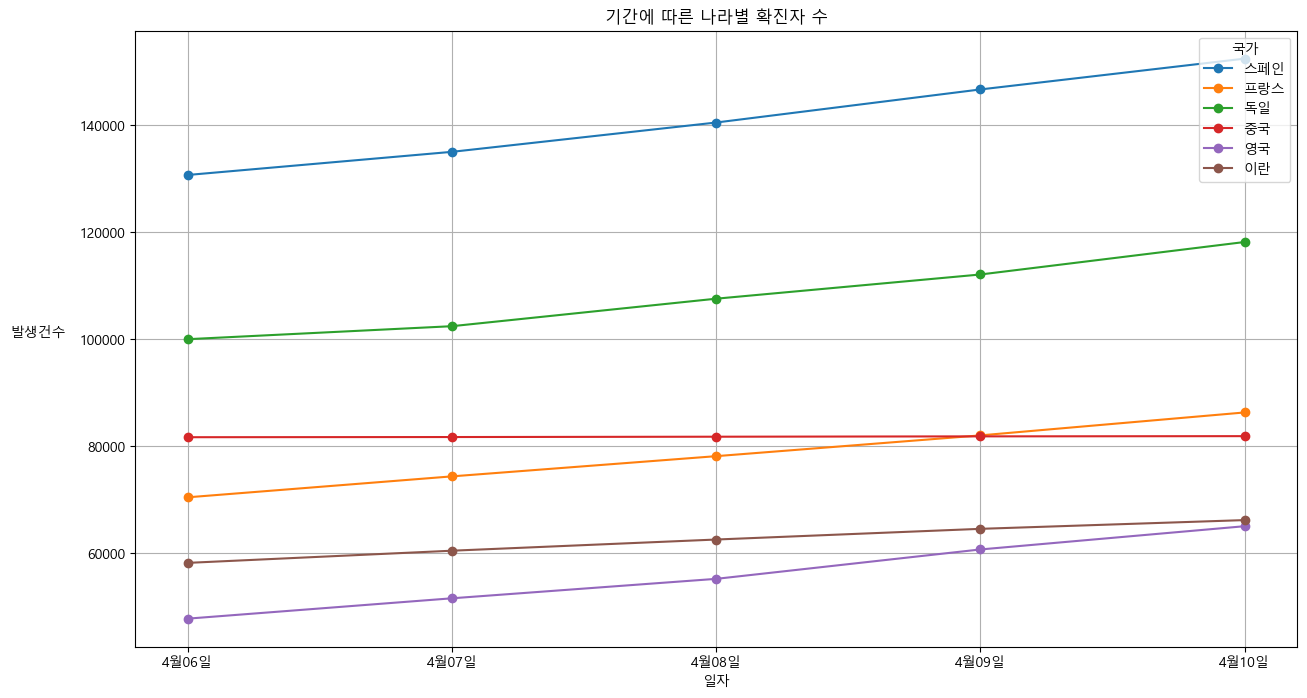

In [26]:
fig = plt.figure(figsize=(15,8))
plt.plot(chartdata.T, marker='o')
# 범례위치 변경 
plt.legend(chartdata.T.columns, loc='upper right', title='국가')
plt.xlabel("일자")
plt.ylabel("발생건수", rotation=0, labelpad=30)
plt.title("기간에 따른 나라별 확진자 수")
plt.grid(True)
plt.show()

# 막대그래프

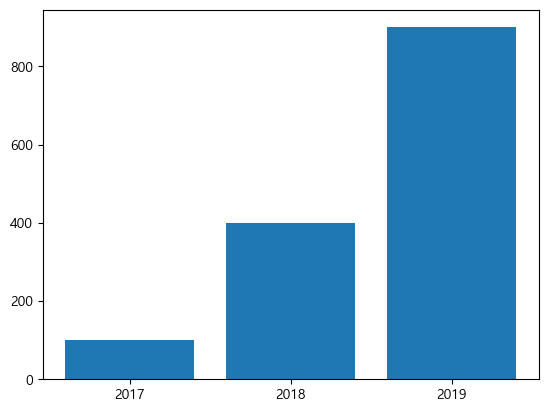

In [22]:
x = np.arange(3)
years = ['2017','2018','2019']
values = [100,400,900]

plt.bar(x, values)
plt.xticks(x, years) # x축 레이블 변경 
plt.show()

<AxesSubplot:xlabel='국가'>

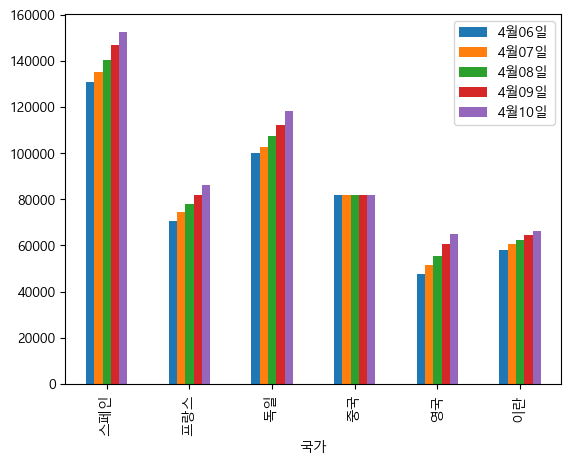

In [24]:
chartdata.plot.bar()

<AxesSubplot:>

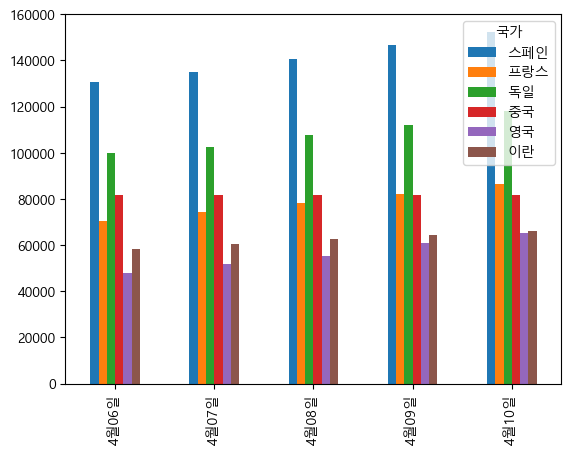

In [25]:
chartdata.T.plot.bar()

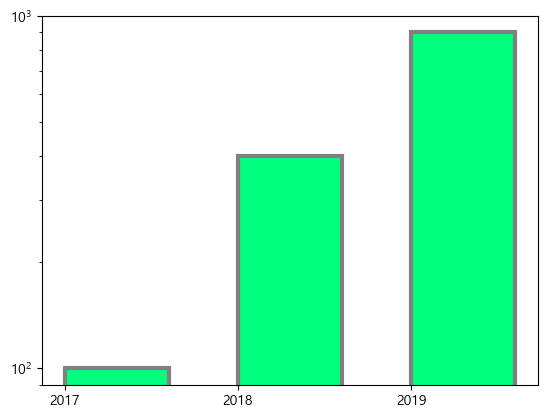

In [27]:
x = np.arange(3)
years = ['2017','2018','2019']
values = [100,400,900]

plt.bar(x, values, width=0.6, align='edge', color='springgreen',
       edgecolor='gray', linewidth=3, tick_label=years, log=True)
# plt.xticks(x, years) # x축 레이블 변경 
plt.show()

- width: 막대 너비
- align: 틱과 막대의 위치 
    - 'edge': 눈금이 왼쪽 끝 
- color: 막대 색 
- edgecolor: 막대 테두리 색 
- linewidth: 테두리 두께 
- tick_label: 레이블 변경 
- log: y축이 로그 스케일로 표시 

# 수평 막대그래프 

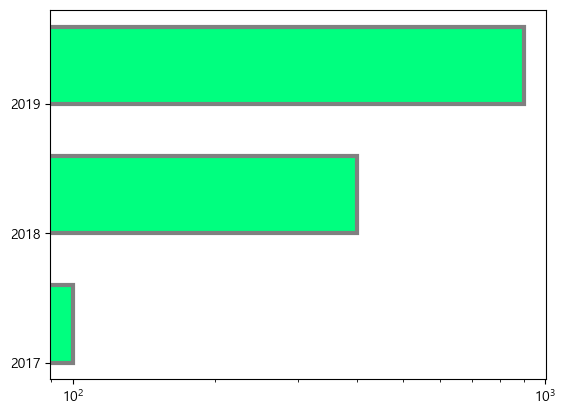

In [28]:
y = np.arange(3)
years = ['2017','2018','2019']
values = [100,400,900]

# 수평으로 좌우로 늘어선 막대그래프: barh 
# 이때는 width가 아니라 height 
plt.barh(y, values, height=0.6, align='edge', color='springgreen',
       edgecolor='gray', linewidth=3, tick_label=years, log=True)
# plt.xticks(x, years) # x축 레이블 변경 
plt.show()

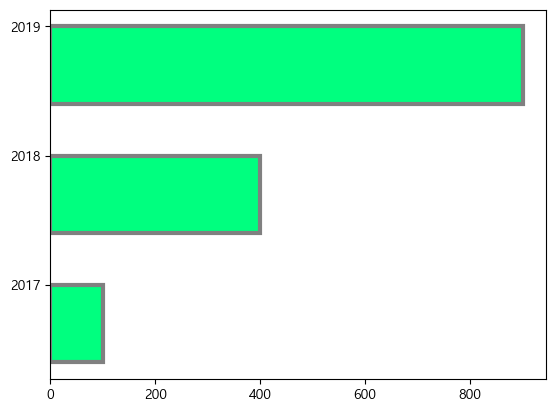

In [29]:
# 눈금 아래에 막대 위치시키기 
plt.barh(y, values, height=-0.6, align='edge', color='springgreen',
       edgecolor='gray', linewidth=3, tick_label=years, log=False)
plt.show()

# 산점도

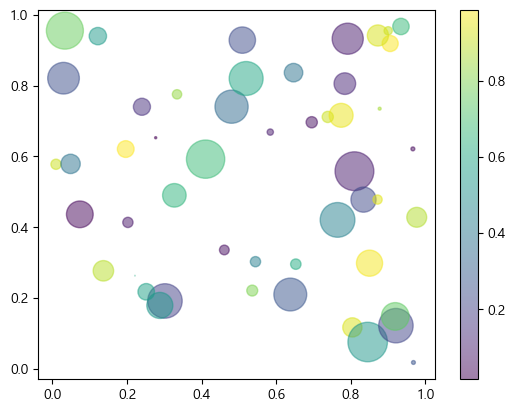

In [47]:
n = 50
# 표준정규분포 
x = np.random.rand(n) # 0~1사이 실수 난수 50개 
y = np.random.rand(n)
# 원의 색깔 랜덤하게 
colors = np.random.rand(n)
# 원의 크기 랜덤하게 
area = (30 * np.random.rand(n)) ** 2

plt.scatter(x,y,s=area,c=colors, alpha=0.5)
plt.colorbar()
plt.show()

In [31]:
x

array([0.24262471, 0.32887612, 0.13470091, 0.76885298, 0.32828795,
       0.99932982, 0.20917082, 0.08194048, 0.42430079, 0.76710825,
       0.48551859, 0.45747759, 0.49048336, 0.39906227, 0.7570202 ,
       0.95451788, 0.13005369, 0.75549988, 0.00769159, 0.8271368 ,
       0.33468425, 0.65769234, 0.36293565, 0.41163652, 0.45765049,
       0.79898327, 0.7542534 , 0.83669074, 0.03420389, 0.81957776,
       0.31804131, 0.98684585, 0.72030542, 0.36403407, 0.74889245,
       0.37912503, 0.34249346, 0.30511986, 0.73323225, 0.90015398,
       0.87638319, 0.03056486, 0.08136837, 0.64309639, 0.87626962,
       0.1754066 , 0.51966584, 0.76208243, 0.8076392 , 0.10407129])

In [35]:
area

array([5.70288813e+02, 3.14638827e+02, 2.99642496e+00, 5.50569237e+01,
       3.12688244e+02, 3.62264371e+02, 3.98033740e-04, 5.45714772e+02,
       1.72645854e+02, 1.03858826e+02, 7.70996112e+02, 1.26040631e+00,
       7.95522736e+02, 4.77556588e+02, 3.04835497e+02, 6.45244653e+02,
       6.08839774e+02, 4.57485324e+01, 8.65219169e+01, 6.82577039e+02,
       4.52581346e+02, 3.78763440e+02, 3.34416729e+01, 5.66345395e+02,
       3.06164749e+02, 6.18644372e-01, 3.92499069e+02, 1.07648875e+02,
       8.90722233e+01, 8.64341376e+01, 4.13875551e+01, 3.74525989e+02,
       8.33758500e+01, 1.48381451e-01, 6.01764141e+02, 1.33029967e+02,
       2.33820628e+02, 4.26981432e-02, 7.80941685e+01, 2.37986262e+01,
       5.13860488e+02, 1.28367936e+02, 6.80255423e+01, 1.35570534e+00,
       1.68768635e+02, 7.95377833e+02, 1.19975000e+01, 3.21679732e+01,
       3.25188375e+02, 1.51723794e+02])

In [33]:
# 균등분포 
np.random.random((3,10))

array([[0.49645354, 0.37230626, 0.24006527, 0.6837953 , 0.12233701,
        0.65608283, 0.7539756 , 0.05212829, 0.3039886 , 0.15375306],
       [0.49349059, 0.7961117 , 0.56015446, 0.99679081, 0.65190443,
        0.68818361, 0.4381188 , 0.70725515, 0.00771071, 0.88049657],
       [0.34529028, 0.00328342, 0.39111298, 0.68471956, 0.17971198,
        0.54690068, 0.85516645, 0.56869985, 0.29358129, 0.11182342]])

In [34]:
np.random.random(10)

array([0.6229578 , 0.89878454, 0.35690416, 0.8071826 , 0.57452495,
       0.75621348, 0.99485381, 0.46350621, 0.82947842, 0.54663623])

# 히스토그램 
- 구간별 빈도 

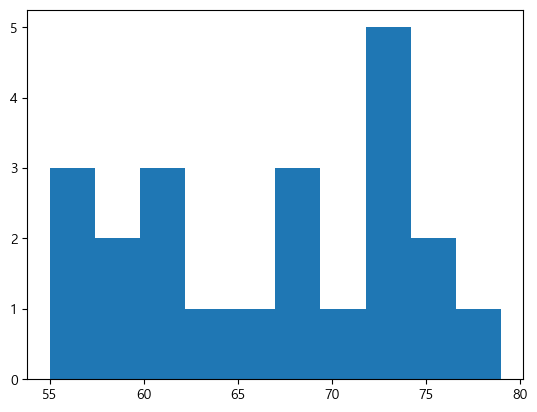

In [36]:
weight = np.random.randint(55,80,22)

plt.hist(weight)
plt.show()

In [37]:
weight

array([67, 68, 73, 56, 63, 62, 57, 58, 70, 73, 65, 76, 74, 69, 75, 61, 72,
       61, 55, 58, 72, 79])

데이터의 분포가 기본적으로 머신러닝 알고리즘 중 "표준정규분포" 여야 효과적인 것들이 있는데, 그럴 때 확인 용도로 씀.

# 파이 차트 

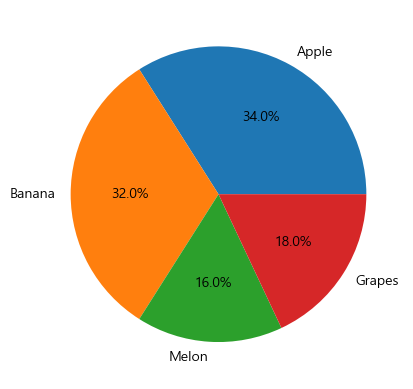

In [38]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

# 반시계 방향으로 레이블 돎
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

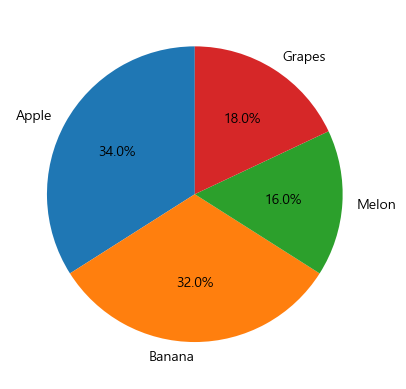

In [39]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

# 반시계 방향으로 레이블 돎
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90)
# 왼쪽으로 90도 돌려서 시작 
plt.show()

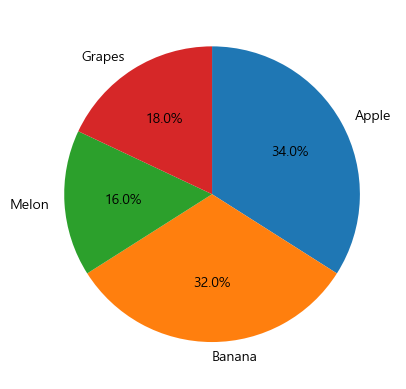

In [40]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

# 시계 방향으로 레이블 돎
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
# 오른쪽으로 90도 돌려서 시작 
plt.show()

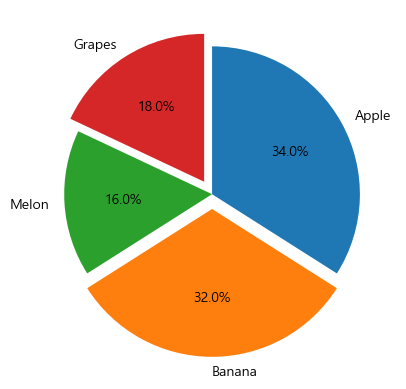

In [41]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.1, 0, 0.1]
# banana, grapes 는 중앙에서 0.1만큼 떨어져있도록 

# 시계 방향으로 레이블 돎
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90,
        counterclock=False, explode=explode)
# 오른쪽으로 90도 돌려서 시작 
plt.show()

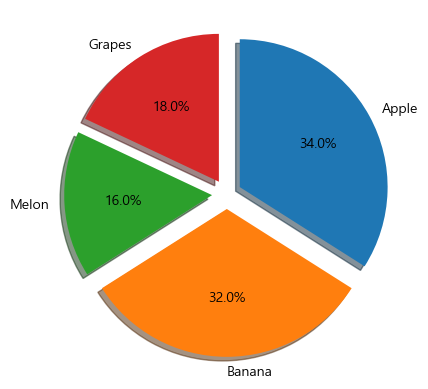

In [44]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0.1, 0.1, 0.1, 0.1]

# 시계 방향으로 레이블 돎
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90,
        counterclock=False, explode=explode, shadow=True)
# 오른쪽으로 90도 돌려서 시작 
plt.show()

# 서브플롯

- plt.subplot(nrow, ncol, pos)
    - 줄, 칸, 위치

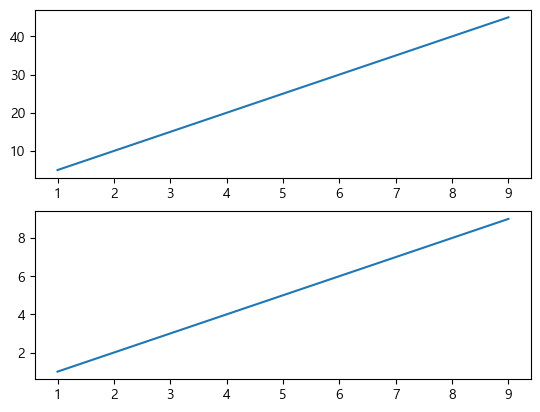

In [45]:
x = np.arange(1,10)
y1 = x*5
y2 = x*1

# 2행 1열짜리 도면 중 첫 도면 
plt.subplot(2,1,1)
plt.plot(x,y1)

# 2행 1열짜리 도면 중 두번째 도면 
plt.subplot(2,1,2)
plt.plot(x,y2)
plt.show()

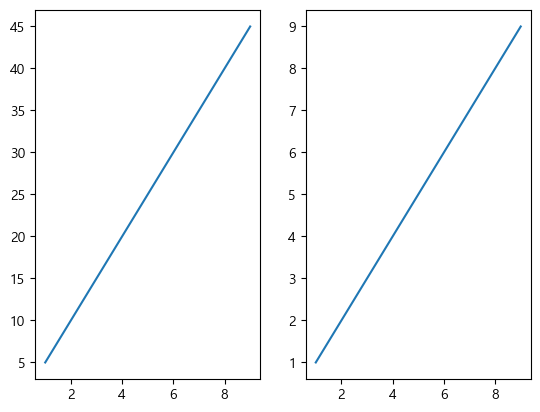

In [46]:
x = np.arange(1,10)
y1 = x*5
y2 = x*1
 
plt.subplot(1,2,1)
plt.plot(x,y1)

plt.subplot(1,2,2)
plt.plot(x,y2)
plt.show()

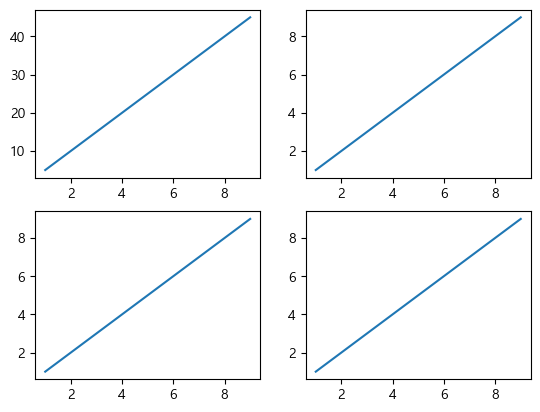

In [48]:
x = np.arange(1,10)
y1 = x*5
y2 = x*1
y3 = x*0.3
y4 = x*0.4

plt.subplot(2,2,1)
plt.plot(x,y1)

plt.subplot(2,2,2)
plt.plot(x,y2)

plt.subplot(2,2,3)
plt.plot(x,y2)

plt.subplot(2,2,4)
plt.plot(x,y2)

plt.show()

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


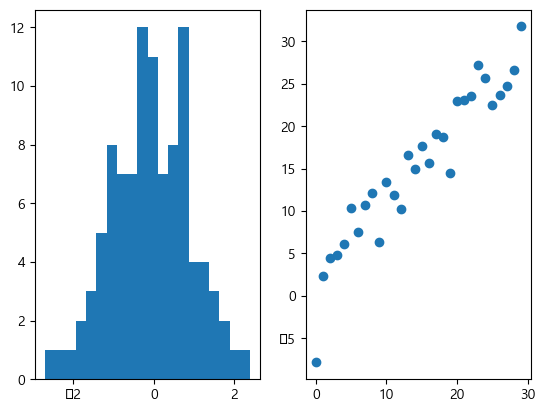

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 히스토그램 구간 20개 
ax1.hist(np.random.randn(100), bins=20)
ax2.scatter(np.arange(30), np.arange(30)+ 3*np.random.randn(30))

plt.show()

In [52]:
# 0~1 사이의 표준정규분포 난수 
np.random.rand(10)

array([0.89953821, 0.97569572, 0.26395395, 0.16751326, 0.73099863,
       0.27726681, 0.54925098, 0.44379201, 0.50437417, 0.25094081])

In [50]:
# 가우시안 표준정규분포 난수 
np.random.randn(10)

array([-0.02702406,  0.69414692,  1.44754778, -0.26802277,  0.8008306 ,
       -0.79111879, -0.61325515,  0.37844676,  0.45914173,  0.05097356])

Text(0.5, 1.0, 'axes 4')

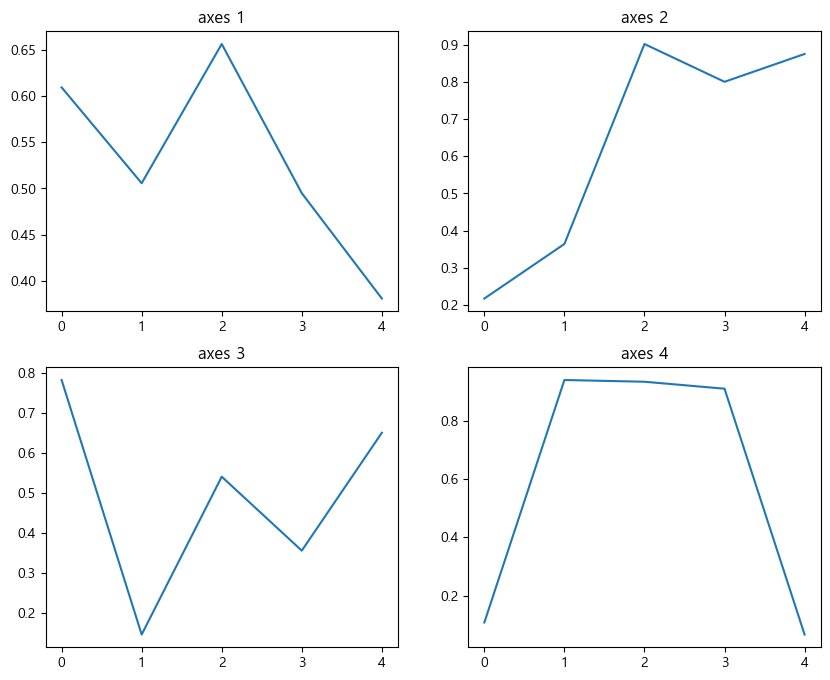

In [51]:
# plt.subplots(nrows=2,ncols=2,..)
fig, axes = plt.subplots(2,2,figsize=(10,8))

axes[0,0].plot(np.random.rand(5))
axes[0,0].set_title("axes 1")

axes[0,1].plot(np.random.rand(5))
axes[0,1].set_title("axes 2")

axes[1,0].plot(np.random.rand(5))
axes[1,0].set_title("axes 3")

axes[1,1].plot(np.random.rand(5))
axes[1,1].set_title("axes 4")

# seaborn 

- 통계 친화적, 색감이 좀더 예쁨

In [53]:
import seaborn as sns # seaborn name space 

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- total_bill: 전체 음식 가격 
- tip: 팁 얼마 줬는지 

In [54]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [56]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 단변량 히스토그램 

- sns.distplot(): distribution plot (분포 그래프)

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


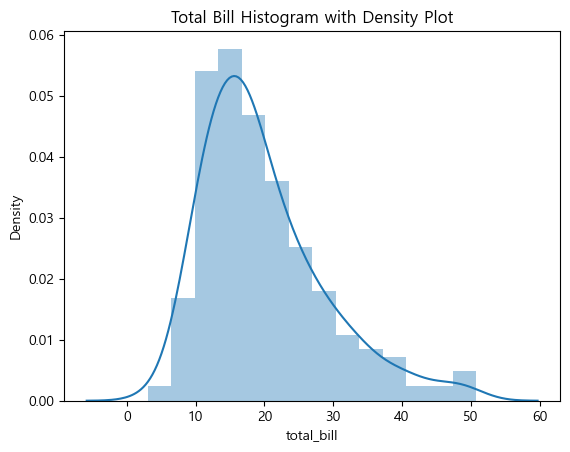

In [57]:
ax = plt.subplots() # 하나의 subplot 
ax = sns.distplot(tips['total_bill'])
ax.set_title("Total Bill Histogram with Density Plot")
plt.show()

- sns.distplot: 전체적인 밀도를 더 편하게 볼수 있음 

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


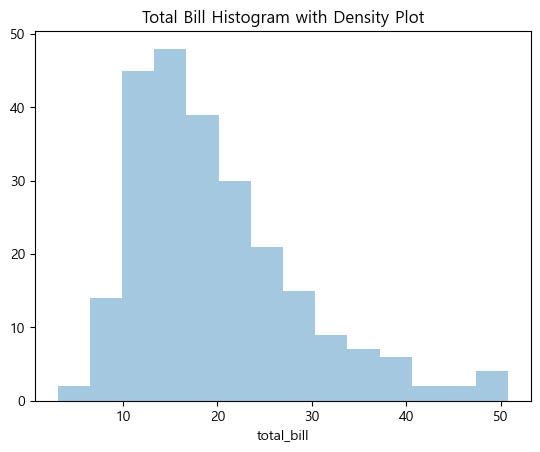

In [58]:
ax = plt.subplots() # 하나의 subplot 
ax = sns.distplot(tips['total_bill'], kde=False) # 밀집도 그래프 제외
ax.set_title("Total Bill Histogram with Density Plot")
plt.show()

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


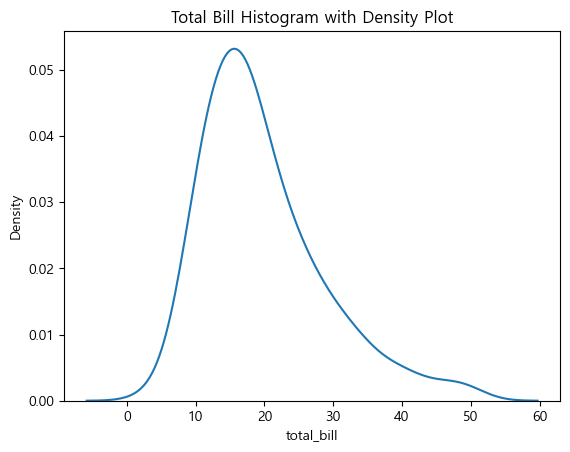

In [59]:
ax = plt.subplots() # 하나의 subplot 
ax = sns.distplot(tips['total_bill'], hist=False) # 히스토그램 제외
ax.set_title("Total Bill Histogram with Density Plot")
plt.show()

## count 그래프

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


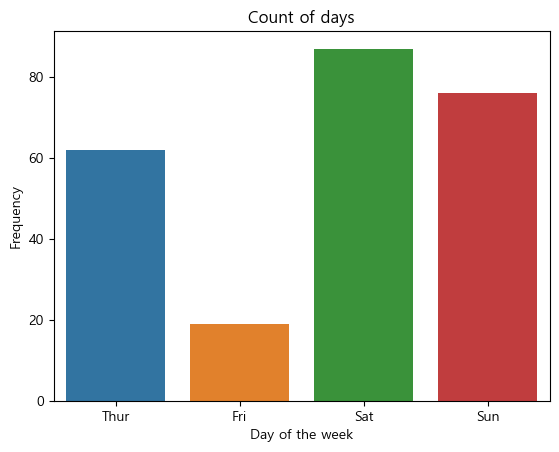

In [60]:
ax = plt.subplots()
# tips 데이터 의 day 컬럼의 count 
ax = sns.countplot("day", data=tips)
ax.set_title("Count of days")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Frequency")
plt.show()

In [61]:
tips.day.unique()                   

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [62]:
tips.day.nunique()

4

## 산점도 그래프 (다변량)

- sns.regplot(): regression plot 회귀 그래프 
    - --> 산점도 

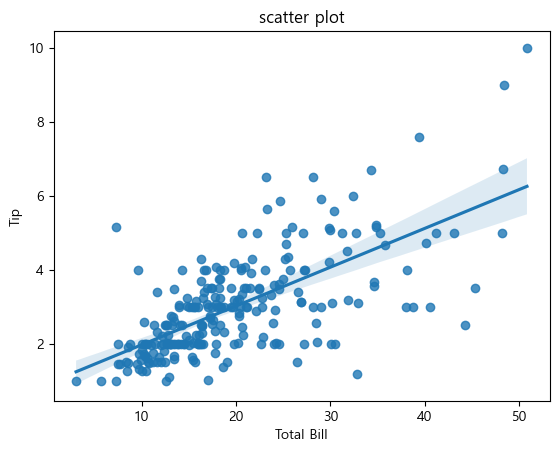

In [63]:
ax = plt.subplots()
ax = sns.regplot(x="total_bill",y="tip",data=tips)
ax.set_title("scatter plot")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
plt.show()

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


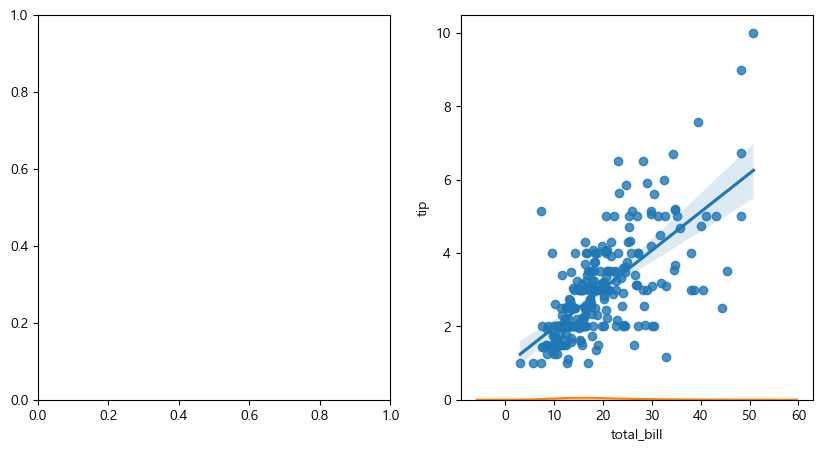

In [70]:
fig, axe = plt.subplots(1,2,figsize=(10,5))
axe[0] = sns.regplot('total_bill', 'tip', data=tips)
axe[0] = sns.distplot(tips['total_bill'])
plt.show()